# Домашнее задание "Теория оптимизации".

### Задание.
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.
Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Решение

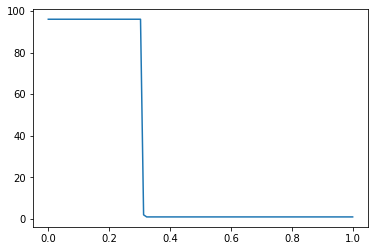

In [1]:
import numpy
from matplotlib import pyplot
from scipy.optimize import differential_evolution

def ackley(x):
    value_0 = numpy.array(x[0])
    value_1 = numpy.array(x[1])

    arg1 = -0.2 * numpy.sqrt(0.5 * (value_0 ** 2 + value_1 ** 2))
    arg2 = 0.5 * (numpy.cos(2. * numpy.pi * value_0) + numpy.cos(2. * numpy.pi * value_1)) 
        
    return -20. * numpy.exp(arg1) - numpy.exp(arg2) + 20. + numpy.e

def show_differential_evolution(func):
    bounds = [(-5, 5), (-5, 5)]
    
    x_values = []
    y_values = []
    
    for tol in numpy.linspace(0, 1, 100):
        result = differential_evolution(
            func=func, 
            bounds=bounds,
            tol=tol, 
            seed=42)
        
        x_values.append(tol)
        y_values.append(result.nit)
        
    pyplot.plot(x_values, y_values)
    pyplot.show()

show_differential_evolution(
    func=ackley)

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

```python
import numpy as np
from scipy.optimize import differential_evolution


def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result
```

### Решение

In [2]:
import numpy
import pandas
from scipy.optimize import differential_evolution


def ackley(x):
    value_0 = numpy.array(x[0])
    value_1 = numpy.array(x[1])

    arg1 = -0.2 * numpy.sqrt(0.5 * (value_0 ** 2 + value_1 ** 2))
    arg2 = 0.5 * (numpy.cos(2. * numpy.pi * value_0) + numpy.cos(2. * numpy.pi * value_1)) 
        
    return -20. * numpy.exp(arg1) - numpy.exp(arg2) + 20. + numpy.e

bounds = [(-10, 10), (-10, 10)]

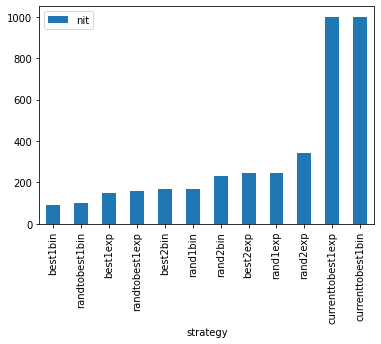

In [3]:
# strategy

def show_differential_evolution_strategy(func, bounds):
    x_values = []
    y_values = []
    
    strategies = [
        'best1bin', 'best1exp', 'rand1exp', 
        'randtobest1exp', 'currenttobest1exp', 'best2exp', 
        'rand2exp', 'randtobest1bin', 'currenttobest1bin', 
        'best2bin', 'rand2bin', 'rand1bin'
    ]
    for strategy in strategies:
        result = differential_evolution(
            func=func, 
            bounds=bounds, 
            strategy=strategy,
            seed=42)
        
        x_values.append(strategy)
        y_values.append(result.nit)
        
    data_frame: pandas.DataFrame = pandas.DataFrame({
        'strategy': x_values, 
        'nit': y_values
    })  
    data_frame = data_frame.sort_values(by=['nit'])
    data_frame.sort_values(by=['nit']).plot.bar(
        x='strategy', 
        y='nit')

show_differential_evolution_strategy(
    func=ackley,
    bounds=bounds)

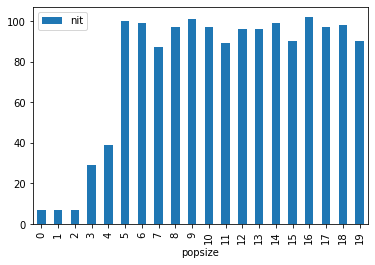

In [4]:
# popsize

def show_differential_evolution_popsize(func, bounds):
    x_values = []
    y_values = []
    
    for popsize in range(20):
        result = differential_evolution(
            func=func, 
            bounds=bounds, 
            popsize=popsize,
            seed=42)
        
        x_values.append(popsize)
        y_values.append(result.nit)
        
    data_frame: pandas.DataFrame = pandas.DataFrame({
        'popsize': x_values, 
        'nit': y_values
    })  
    data_frame = data_frame
    data_frame.plot.bar(
        x='popsize', 
        y='nit')

show_differential_evolution_popsize(
    func=ackley,
    bounds=bounds)

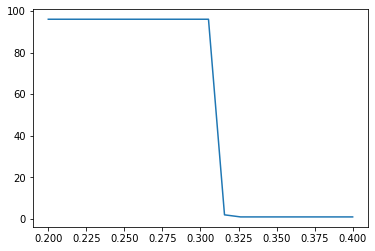

In [5]:
# tol

def show_differential_evolution_tol(func, bounds):
    bounds = [(-5, 5), (-5, 5)]
    
    x_values = []
    y_values = []
    
    for tol in numpy.linspace(0.2, 0.4, 20):
        result = differential_evolution(
            func=func, 
            bounds=bounds,
            tol=tol, 
            seed=42)
        
        x_values.append(tol)
        y_values.append(result.nit)
        
    pyplot.plot(x_values, y_values)
    pyplot.show()

show_differential_evolution_tol(
    func=ackley,
    bounds=bounds)

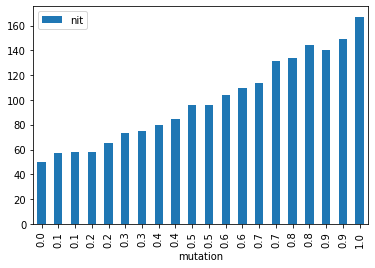

In [6]:
# mutation

def show_differential_evolution_mutation(func, bounds):
    x_values = []
    y_values = []
    
    for mutation in numpy.linspace(0, 1, 20):
        result = differential_evolution(
            func=func, 
            bounds=bounds, 
            mutation=(mutation, 1),
            seed=42)
        
        x_values.append(round(mutation, 1))
        y_values.append(result.nit)
        
    data_frame: pandas.DataFrame = pandas.DataFrame({
        'mutation': x_values, 
        'nit': y_values
    })  
    data_frame.plot.bar(
        x='mutation', 
        y='nit')

show_differential_evolution_mutation(
    func=ackley,
    bounds=bounds)

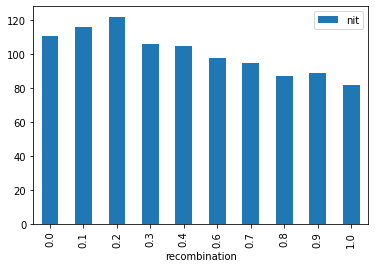

In [7]:
# recombination

def show_differential_evolution_recombination(func, bounds):
    x_values = []
    y_values = []
    
    for recombination in numpy.linspace(0, 1, 10):
        result = differential_evolution(
            func=func, 
            bounds=bounds, 
            recombination=recombination,
            seed=42)
        
        x_values.append(round(recombination, 1))
        y_values.append(result.nit)
        
    data_frame: pandas.DataFrame = pandas.DataFrame({
        'recombination': x_values, 
        'nit': y_values
    })  
    data_frame.plot.bar(
        x='recombination', 
        y='nit')

show_differential_evolution_recombination(
    func=ackley,
    bounds=bounds)

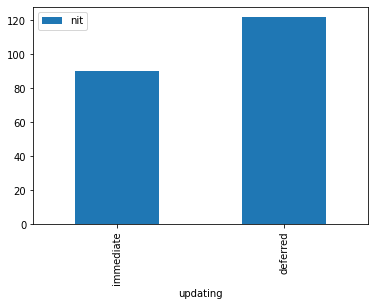

In [8]:
# updating

def show_differential_evolution_updating(func, bounds):
    x_values = []
    y_values = []
    
    updatings = ['immediate', 'deferred']
    for updating in updatings:
        result = differential_evolution(
            func=func, 
            bounds=bounds, 
            updating=updating,
            seed=42)
        
        x_values.append(updating)
        y_values.append(result.nit)
        
    data_frame: pandas.DataFrame = pandas.DataFrame({
        'updating': x_values, 
        'nit': y_values
    })  
    data_frame.plot.bar(
        x='updating', 
        y='nit')

show_differential_evolution_updating(
    func=ackley,
    bounds=bounds)

In [9]:
# result


def show_differential_evolution_total(func, bounds):
    x_values = []
    y_values = []
    
    return differential_evolution(
        func=func, 
        bounds=bounds,
        tol=0.33,
        strategy='best1bin',
        popsize=2,
        mutation=(0.0, 1),
        recombination=1,
        updating='immediate',
        seed=42)

# parameters:
# tol = 0.325
# strategy = 'best1bin'
# popsize = 2
# mutation = (0.0, 1)
# recombination = 1
# updating = 'immediate'

show_differential_evolution_total(
    func=ackley,
    bounds=bounds)

     fun: 1.4814525162165637e-08
     jac: array([0.05558185, 1.20437171])
 message: 'Optimization terminated successfully.'
    nfev: 178
     nit: 1
 success: True
       x: array([-4.89514203e-09, -1.86315719e-09])